## Implementation of Grover’s Algorithm

*Suppakorn Rakna*
**63070501061**

In [1]:
import math
from qiskit import *
from qiskit.quantum_info.operators import Operator
from qiskit.tools.visualization import plot_histogram

In [2]:
#superposition
def superposition(circuit, qr):
    
    for q in qr:
        circuit.h(q)

    circuit.barrier()

In [3]:
#Orcale
def oracle(search):
    
    n = len(search)
    search = int(search, 2)
    Uf = [[((0, 1) [i == j]) for j in range(2**n)] for i in range(2**n)]
    Uf[search][search] = -1
    
    return Operator(Uf)

- **Diffuser**: $U_d=2A - I = \begin{bmatrix} -1 + \tfrac{2}{2^n} & \tfrac{2}{2^n} & \dots & \tfrac{2}{2^n} \\ \tfrac{2}{2^n} & -1 + \tfrac{2}{2^n} & \dots & \tfrac{2}{2^n} \\ \vdots & \vdots & \ddots & \vdots \\ \tfrac{2}{2^n} & \tfrac{2}{2^n} & \dots & -1 + \tfrac{2}{2^n} \end{bmatrix}$
where $A = \tfrac{1}{2^n} \cdot I_{2^n \times 2^n}$ is the matrix with all entries equal to $\tfrac{1}{2^n}$

In [4]:
#Diffuser
def diffuser(search):
    
    n = len(search)
    return Operator([[(2/(2 ** n) - ((0, 1)[i == j])) for j in range(2**n)] for i in range(2**n)])

In [5]:
def grover(search):

    n = len(search)
    qr = QuantumRegister(n)
    groverCircuit = QuantumCircuit(qr)

    superposition(groverCircuit, qr)
    
    Uf = oracle(search)
    Ud = diffuser(search)
#The LOOP
    for repeat in range (math.floor((math.pi/4) * (math.sqrt(2 ** n)))):
        groverCircuit.unitary(Uf, [qr[i] for i in range(n)], label='Uf[{}]'.format(repeat))
        groverCircuit.unitary(Ud, [qr[i] for i in range(n)], label='Ud[{}]'.format(repeat))
        
    return groverCircuit

> repeat $\big\lfloor\frac{\pi}{4}\sqrt{2^n}\big\rfloor$ times

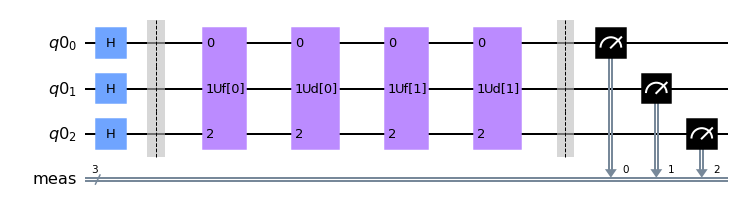

In [6]:
groverCircuit = grover(search='010')
groverCircuit.measure_all()
groverCircuit.draw(output='mpl')

{'001': 15, '110': 4, '100': 5, '111': 3, '011': 5, '101': 10, '000': 8, '010': 974}


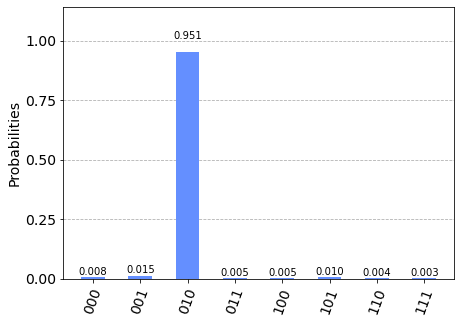

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(groverCircuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts(groverCircuit)
print(counts)
plot_histogram(counts)